# Paid values in each Curitiba´s government plan

Curitiba´s mayor has the folowing government plans:
* VIVA CURITIBA QUE NÃO DORME
* VIVA CURITIBA CIDADÃ
* VIVA CURITIBA SAUDÁVEL
* VIVA CURITIBA TECNOLÓGICA
* VIVA UMA NOVA CURITIBA
* VIVA CURITIBA MAIS ÁGIL
* VIVA CURITIBA TRANSPARENTE

Let's see wich one has paid more in june, july and august.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('20190901_Despesas_Base_de_Dados.csv',delimiter=';',encoding='latin1', skiprows=[1])

In [3]:
df.head()

,ANO_EMPENHO,DT_EMPENHO,CD_FONTE,DS_FONTE,CD_FUNCAO,DS_FUNCAO,CD_PROGRAMA,DS_PROGRAMA,CD_ACAO,DS_ACAO,...,VL_TOTAL,PROTOCOLOSUP,DT_TRANSACAO,NR_PARCELA,TRANSACAO,VL_LIQUIDADO,VL_DEVOLVIDO,VL_ANULADO,VL_PAGO,VL_CONSIGNADO
0,2019,2019-06-04,24,Recursos Próprios do Fundo Municipal de Habita...,16,HABITAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2066,"MANUTENÇÃO E EXECUÇÃO DOS SERVIÇOS TÉCNICOS, A...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,2019-07-29,24,Recursos Próprios do Fundo Municipal de Habita...,16,HABITAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2066,"MANUTENÇÃO E EXECUÇÃO DOS SERVIÇOS TÉCNICOS, A...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2019-08-22,24,Recursos Próprios do Fundo Municipal de Habita...,16,HABITAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2066,"MANUTENÇÃO E EXECUÇÃO DOS SERVIÇOS TÉCNICOS, A...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,2019-08-26,24,Recursos Próprios do Fundo Municipal de Habita...,16,HABITAÇÃO,2,PROGRAMA VIVA CURITIBA CIDADÃ,2066,"MANUTENÇÃO E EXECUÇÃO DOS SERVIÇOS TÉCNICOS, A...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,2019-06-19,1,Recursos do Tesouro (Descentralizados),6,SEGURANÇA PÚBLICA,2,PROGRAMA VIVA CURITIBA CIDADÃ,2025,PREVENÇÃO E ADMINISTRAÇÃO DE POTENCIAIS DESAST...,...,"295,0000",85-010952/2019,2019-08-05 00:00:00.000,1.0,Pagamento de Empenho,"0,00","0,00","0,00","525,00","0,00"


# Data Cleaning

In [4]:
df.columns

Index(['ANO_EMPENHO', 'DT_EMPENHO', 'CD_FONTE', 'DS_FONTE', 'CD_FUNCAO',
       'DS_FUNCAO', 'CD_PROGRAMA', 'DS_PROGRAMA', 'CD_ACAO', 'DS_ACAO',
       'CD_SUBELEMENTO', 'DS_SUBELEMENTO', 'CD_ORGAO', 'DS_ORGAO',
       'CD_DESPESA', 'DS_DESPESA', 'CODIGO_DESPESA_GRUPO', 'DS_GRUPO',
       'CODIGO_DESPESA_MODALIDADE', 'DS_MODALIDADE', 'CODIGO_DESPESA_ELEMENTO',
       'DS_ELEMENTO', 'CPF_CNPJ', 'NR_EMPENHO', 'LICITACAO', 'VL_EMPENHADO',
       'CD_ITEM', 'DS_ITEM', 'DS_UNIDADE', 'QUANTIDADE', 'VL_PRECO_UNITARIO',
       'VL_TOTAL', 'PROTOCOLOSUP', 'DT_TRANSACAO', 'NR_PARCELA', 'TRANSACAO',
       'VL_LIQUIDADO', 'VL_DEVOLVIDO', 'VL_ANULADO', 'VL_PAGO',
       'VL_CONSIGNADO'],
      dtype='object')

In [5]:
#Remove columns
df = df.drop(['ANO_EMPENHO','CD_FONTE','DS_FONTE','CD_FUNCAO','CD_PROGRAMA','CD_ACAO', 'DS_ACAO','VL_TOTAL','DS_SUBELEMENTO',
             'CD_DESPESA', 'DS_DESPESA','CODIGO_DESPESA_GRUPO', 'DS_GRUPO','CODIGO_DESPESA_MODALIDADE', 'DS_MODALIDADE',
              'CODIGO_DESPESA_ELEMENTO','DS_ELEMENTO','VL_LIQUIDADO','VL_DEVOLVIDO','VL_ANULADO','CD_SUBELEMENTO','CD_ORGAO'],1)

In [6]:
df.head()

,DT_EMPENHO,DS_FUNCAO,DS_PROGRAMA,DS_ORGAO,CPF_CNPJ,NR_EMPENHO,LICITACAO,VL_EMPENHADO,CD_ITEM,DS_ITEM,DS_UNIDADE,QUANTIDADE,VL_PRECO_UNITARIO,PROTOCOLOSUP,DT_TRANSACAO,NR_PARCELA,TRANSACAO,VL_PAGO,VL_CONSIGNADO
0,2019-06-04,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,FUNDO MUNICIPAL DE HABITAÇÃO DE INTERESSE SOCIAL,14416060000102,2,PE 6/2018 COHAB-CT/FMHIS,"90843,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-07-29,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,FUNDO MUNICIPAL DE HABITAÇÃO DE INTERESSE SOCIAL,913138000181,3,PE 1/2019 COHAB-CT/FMHIS,"87085,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-22,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,FUNDO MUNICIPAL DE HABITAÇÃO DE INTERESSE SOCIAL,1160006000199,4,CP 1/2019 FMHIS,"19800,00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-08-26,HABITAÇÃO,PROGRAMA VIVA CURITIBA CIDADÃ,FUNDO MUNICIPAL DE HABITAÇÃO DE INTERESSE SOCIAL,913138000181,5,CP 3/2016 FMHIS,"67747,40",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-06-19,SEGURANÇA PÚBLICA,PROGRAMA VIVA CURITIBA CIDADÃ,FUNDO MUNICIPAL DE DEFESA CIVIL,8409439000184,5,DS 2/2019 FUMDEC,"525,00",3.0,"MOTOBOMBA, CONSERTO, MANUTENÇÃO DE MOTOBOMBA A...",MO,"1,0000","295,0000",85-010952/2019,2019-08-05 00:00:00.000,1.0,Pagamento de Empenho,"525,00","0,00"


In [7]:
df.dtypes

DT_EMPENHO            object
DS_FUNCAO             object
DS_PROGRAMA           object
DS_ORGAO              object
CPF_CNPJ               int64
NR_EMPENHO             int64
LICITACAO             object
VL_EMPENHADO          object
CD_ITEM              float64
DS_ITEM               object
DS_UNIDADE            object
QUANTIDADE            object
VL_PRECO_UNITARIO     object
PROTOCOLOSUP          object
DT_TRANSACAO          object
NR_PARCELA           float64
TRANSACAO             object
VL_PAGO               object
VL_CONSIGNADO         object
dtype: object

In [8]:
# Change column DT_EMPENHO to datetime type
df['DT_EMPENHO'] = pd.to_datetime(df['DT_EMPENHO'])

# Replace comma for dot in VL_PAGO column
df['VL_PAGO'] = df['VL_PAGO'].str.replace(',', '.')

# Change column VL_PAGO to numeric type
df['VL_PAGO'] = pd.to_numeric(df['VL_PAGO'])

# Change column CPF_CNPJ to object
df['CPF_CNPJ'] = df['CPF_CNPJ'].astype(object)

In [9]:
df.dtypes

DT_EMPENHO           datetime64[ns]
DS_FUNCAO                    object
DS_PROGRAMA                  object
DS_ORGAO                     object
CPF_CNPJ                     object
NR_EMPENHO                    int64
LICITACAO                    object
VL_EMPENHADO                 object
CD_ITEM                     float64
DS_ITEM                      object
DS_UNIDADE                   object
QUANTIDADE                   object
VL_PRECO_UNITARIO            object
PROTOCOLOSUP                 object
DT_TRANSACAO                 object
NR_PARCELA                  float64
TRANSACAO                    object
VL_PAGO                     float64
VL_CONSIGNADO                object
dtype: object

In [10]:
df['DS_PROGRAMA'].unique().tolist()

['PROGRAMA VIVA CURITIBA CIDADÃ',
 'PROGRAMA VIVA CURITIBA QUE NÃO DORME',
 'PROGRAMA VIVA CURITIBA MAIS ÁGIL',
 'PROGRAMA VIVA CURITIBA TRANSPARENTE',
 'PROGRAMA VIVA CURITIBA TECNOLÓGICA',
 'PROGRAMA DE OPERAÇÕES ESPECIAIS',
 'PROGRAMA VIVA CURITIBA SAUDÁVEL',
 'PROGRAMA VIVA UMA NOVA CURITIBA']

In [11]:
# Rename DS_PROGRAMA categories

mapper = {'PROGRAMA VIVA CURITIBA CIDADÃ':'CURITIBA CIDADÃ','PROGRAMA VIVA CURITIBA QUE NÃO DORME':'CURITIBA QUE NÃO DORME',
          'PROGRAMA VIVA CURITIBA TECNOLÓGICA':'CURITIBA TECNOLÓGICA','PROGRAMA VIVA CURITIBA MAIS ÁGIL':'CURITIBA MAIS ÁGIL',
        'PROGRAMA VIVA CURITIBA TRANSPARENTE':'CURITIBA TRANSPARENTE','PROGRAMA DE OPERAÇÕES ESPECIAIS':'OPERAÇÕES ESPECIAIS',
          'PROGRAMA VIVA CURITIBA SAUDÁVEL':'CURITIBA SAUDÁVEL','PROGRAMA VIVA UMA NOVA CURITIBA':'UMA NOVA CURITIBA',
}

df['DS_PROGRAMA'] = df['DS_PROGRAMA'].map(mapper)

# Data Visualization

In [12]:
despesas_programa = df.groupby('DS_PROGRAMA')
despesas_programa = despesas_programa['VL_PAGO'].sum()

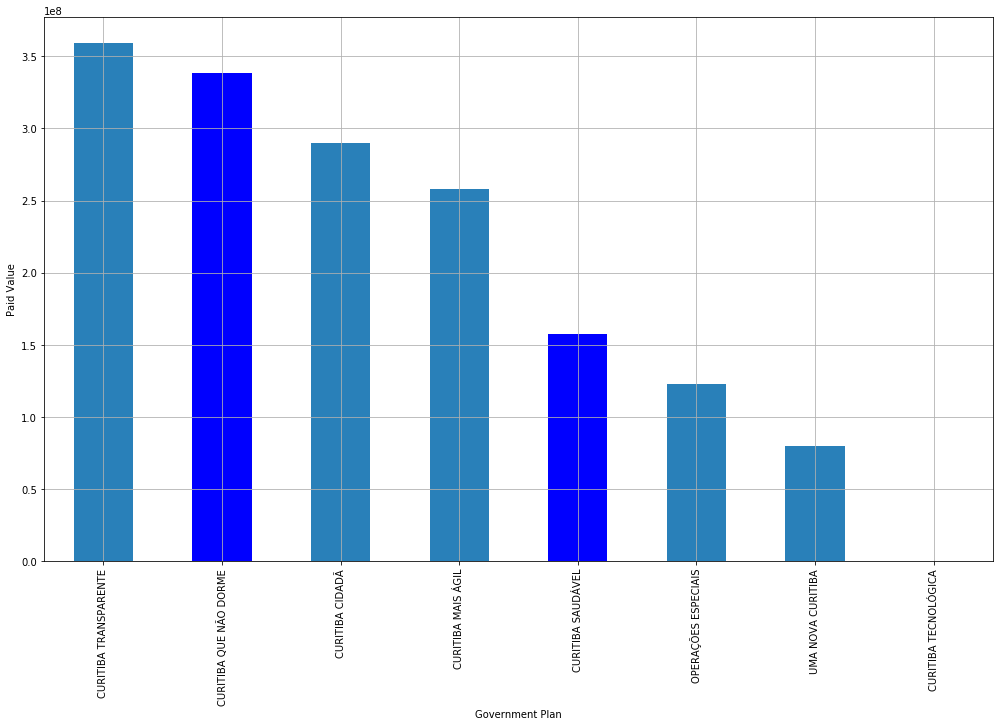

In [19]:
despesas_programa.sort_values(ascending=False)\
    .plot(grid=True, kind='bar', figsize=(17,10), color=['#2980b9', 'blue'])


plt.ylabel('Paid Value')
plt.xlabel('Government Plan')
plt.show()